In [15]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from pathlib import Path
from prophet import Prophet
from datetime import datetime
from pandas import to_datetime


import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
spy_df = pd.read_csv(Path("./Resources/spy.csv"))
spy_df= spy_df.drop(columns=['Open','High','Low','Day','Weekday','Week','Month','Year','Volume'])
spy_df

,Date,Close
0,1/2/14,154.989548
1,1/3/14,154.964035
2,1/6/14,154.515045
3,1/7/14,155.464020
4,1/8/14,155.497864
...,...,...
2300,2/22/23,398.540008
2301,2/23/23,400.660004
2302,2/24/23,396.380005
2303,2/27/23,397.730011


In [19]:
print(min(spy_df['Date']))
print(max(spy_df['Date']))

1/10/14
9/9/22


In [20]:
spy_df = pd.read_csv(Path("./Resources/spy.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True).dropna()
spy_df= spy_df['Close']
spy_df = spy_df.reset_index()
spy_df.columns= ["ds","y"]
spy_df['ds']= to_datetime(spy_df['ds'])
spy_df



,ds,y
0,2014-01-02,154.989548
1,2014-01-03,154.964035
2,2014-01-06,154.515045
3,2014-01-07,155.464020
4,2014-01-08,155.497864
...,...,...
2300,2023-02-22,398.540008
2301,2023-02-23,400.660004
2302,2023-02-24,396.380005
2303,2023-02-27,397.730011


In [54]:

train = spy_df[spy_df['ds'] < '2023-01-03']
test = spy_df[spy_df['ds'] >= '2023-01-03']
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365, freq="D")
forecast = m.predict(future)
# Make a prediction using the testing data
testing_predections = m.predict(test)


21:57:11 - cmdstanpy - INFO - Chain [1] start processing
21:57:12 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-02,155.085767,141.858743,178.970824,155.085767,155.085767,4.765261,4.765261,4.765261,0.174227,0.174227,0.174227,4.591034,4.591034,4.591034,0.0,0.0,0.0,159.851028
1,2014-01-03,155.142777,141.738565,178.432794,155.142777,155.142777,4.857020,4.857020,4.857020,0.119099,0.119099,0.119099,4.737921,4.737921,4.737921,0.0,0.0,0.0,159.999797
2,2014-01-06,155.313808,142.945601,178.082369,155.313808,155.313808,5.155986,5.155986,5.155986,0.171380,0.171380,0.171380,4.984606,4.984606,4.984606,0.0,0.0,0.0,160.469794
3,2014-01-07,155.370818,142.978704,179.815033,155.370818,155.370818,5.249055,5.249055,5.249055,0.256753,0.256753,0.256753,4.992302,4.992302,4.992302,0.0,0.0,0.0,160.619873
4,2014-01-08,155.427828,141.860676,179.842271,155.427828,155.427828,5.177532,5.177532,5.177532,0.217572,0.217572,0.217572,4.959960,4.959960,4.959960,0.0,0.0,0.0,160.605361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,2023-12-26,389.984345,351.459301,438.606765,351.324266,430.957017,3.313458,3.313458,3.313458,0.256753,0.256753,0.256753,3.056705,3.056705,3.056705,0.0,0.0,0.0,393.297804
2627,2023-12-27,389.953930,348.011434,437.589862,351.090642,431.059467,3.475997,3.475997,3.475997,0.217572,0.217572,0.217572,3.258425,3.258425,3.258425,0.0,0.0,0.0,393.429927
2628,2023-12-28,389.923514,351.007555,438.098272,350.878099,431.166458,3.646081,3.646081,3.646081,0.174227,0.174227,0.174227,3.471853,3.471853,3.471853,0.0,0.0,0.0,393.569595
2629,2023-12-29,389.893098,350.933593,439.552814,350.730108,431.310975,3.810273,3.810273,3.810273,0.119099,0.119099,0.119099,3.691175,3.691175,3.691175,0.0,0.0,0.0,393.703371


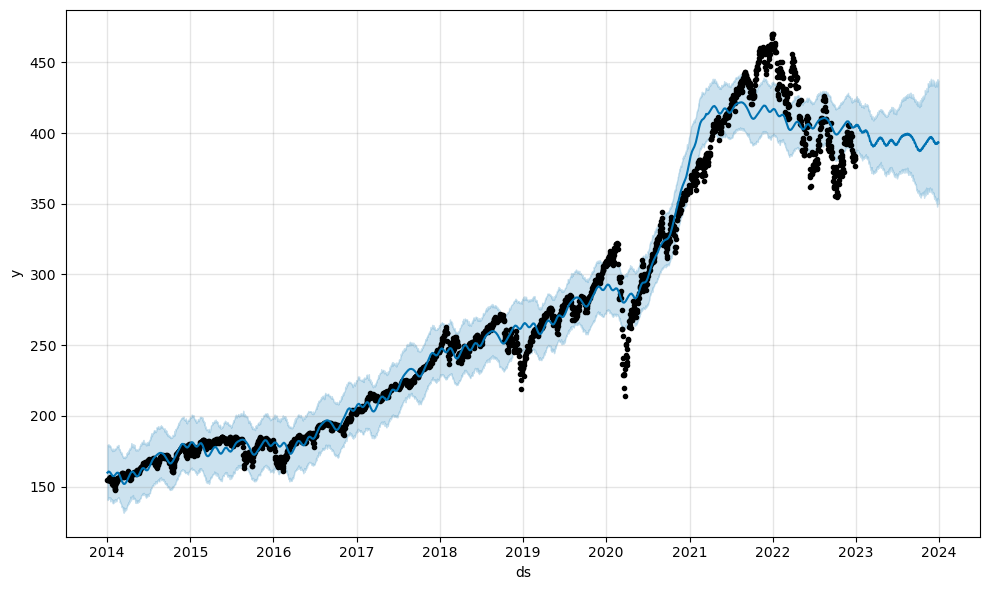

In [29]:
forecast_fig = m.plot(forecast)

In [52]:
#Performance Metrics 
# Initial training period.
initial= 2*365
initial= str(initial)+' days'
#Period length that we perform the cross validation for.
period= 2*365
period=str(period)+' days'
#Horizon of prediction essentially for each fold.
horizon = 365
horizon=str(horizon)+' days'
fb_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon)
# Performance Metrics of fb_cv
performance_metrics(fb_cv)

  0%|          | 0/3 [00:00<?, ?it/s]

21:23:11 - cmdstanpy - INFO - Chain [1] start processing
21:23:12 - cmdstanpy - INFO - Chain [1] done processing
21:23:12 - cmdstanpy - INFO - Chain [1] start processing
21:23:12 - cmdstanpy - INFO - Chain [1] done processing
21:23:12 - cmdstanpy - INFO - Chain [1] start processing
21:23:13 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,619.215317,24.884037,20.954278,0.059763,0.060732,0.059821,0.080000
1,38 days,623.765433,24.975296,21.068246,0.060192,0.060732,0.060275,0.073333
2,39 days,649.090837,25.477261,21.527194,0.061164,0.060817,0.061144,0.066667
3,40 days,672.536773,25.933314,21.985728,0.062130,0.061942,0.062034,0.060000
4,41 days,699.284093,26.443980,22.693893,0.063895,0.064396,0.063798,0.046667
...,...,...,...,...,...,...,...,...
323,361 days,12128.232425,110.128254,82.232132,0.232612,0.144498,0.199456,0.328889
324,362 days,12565.275713,112.094941,84.320472,0.238806,0.147285,0.204271,0.320000
325,363 days,13150.976616,114.677708,86.919165,0.245098,0.147367,0.209096,0.293333
326,364 days,13264.066401,115.169729,87.322800,0.246037,0.147367,0.209827,0.280000


In [ ]:
# Print the balanced_accuracy score of the model
# forecast_sub = forecast[['ds','yhat']]
# test = test[['ds','y']]
# eval_df = test.merge(forecast_sub, on=['ds'],how='left')
# #error for the prediction
# eval_df['abs_error'] = abs(eval_df['y']-eval_df['yhat'])
# #
# eval_df['daily_FA'] = 1-(eval_df['abs_error']/eval_df['y'])
# total_y = sum(eval_df['y'])
# total_error = sum(eval_df['abs_error'])
# forecast_acc= 1-(total_error/total_y)
# print(forecast_acc)